# Redes Neuronales Convolucionales - MNIST Fashion

## 0. Librerías

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

## 1. Conjunto de datos Fashion-MNIST

### 1.1 Modelo básico

In [3]:
# Preparación de los datos
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [4]:
# Red neuronal convolucional
model = Sequential()
model.add(Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

print("[INFO] Entrenando Red Neuronal Convolucional...\n")
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy:", test_acc)

[INFO] Entrenando Red Neuronal Convolucional...

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.8300 - accuracy: 0.7070
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5083 - accuracy: 0.8173
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4501 - accuracy: 0.8407
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4170 - accuracy: 0.8532
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8559

Test accuracy: 0.85589998960495


### 1.2. Capas y optimizadores

In [5]:
# Probamos con otra red neuronal convolucional
model = Sequential()
model.add(
    Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1))
)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 64)               

In [7]:
# Entrenamiento de la red neuronal convolucional
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

print("[INFO] Entrenando Red Neuronal Convolucional")
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy:", test_acc)

[INFO] Entrenando Red Neuronal Convolucional
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7761 - accuracy: 0.7208
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8202
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4239 - accuracy: 0.8475
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3857 - accuracy: 0.8625
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3897 - accuracy: 0.8531

Test accuracy: 0.8531000018119812


In [8]:
# Prueba con otro optimizador (Adam)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

print("[INFO] Entrenando Red Neuronal Convolucional...")
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy:", test_acc)

[INFO] Entrenando Red Neuronal Convolucional...


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3481 - accuracy: 0.8730
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2610 - accuracy: 0.9041
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2213 - accuracy: 0.9174
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1914 - accuracy: 0.9278
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2441 - accuracy: 0.9177

Test accuracy: 0.9176999926567078


### 1.3. Capas de Dropout y BatchNormalization

In [9]:
# Red neuronal con Dropout y BatchNormalization
def make_model():
    model = Sequential()
    model.add(
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            strides=1,
            padding="same",
            input_shape=(28, 28, 1),
        )
    )
    model.add(BatchNormalization())

    model.add(
        Conv2D(
            filters=32, kernel_size=(3, 3), activation="relu", strides=1, padding="same"
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(
        Conv2D(
            filters=64, kernel_size=(3, 3), activation="relu", strides=1, padding="same"
        )
    )
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(
        Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation="relu",
            strides=1,
            padding="same",
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))

    return model

In [10]:
# Análisis de la red neuronal
model = make_model()

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)       

In [11]:
# Entrenamiento de la red neuronal
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

print("[INFO] Entrenando Red Neuronal Convolucional...")
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy:", test_acc)

[INFO] Entrenando Red Neuronal Convolucional...
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4958 - accuracy: 0.8283
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3213 - accuracy: 0.8861
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2747 - accuracy: 0.9036
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2476 - accuracy: 0.9135
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2061 - accuracy: 0.9259

Test accuracy: 0.9258999824523926


### 1.4. Decaimiento del ratio de aprendizaje

In [48]:
# Aplicar LearningRateScheduler
model = make_model()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.01 * 0.9**x)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

print("[INFO] Entrenando Red Neuronal Convolucional...")
history = model.fit(
    train_images,
    train_labels,
    epochs=30,
    callbacks=[reduce_lr, early_stop],
    validation_split=0.2,
)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy:", test_acc)

[INFO] Entrenando Red Neuronal Convolucional...
Epoch 1/30
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5258 - accuracy: 0.8165 - val_loss: 0.3317 - val_accuracy: 0.8733 - lr: 0.0010
Epoch 2/30
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3323 - accuracy: 0.8833 - val_loss: 0.2817 - val_accuracy: 0.8941 - lr: 9.0000e-04
Epoch 3/30
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2854 - accuracy: 0.8992 - val_loss: 0.2385 - val_accuracy: 0.9089 - lr: 8.1000e-04
Epoch 4/30
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2476 - accuracy: 0.9127 - val_loss: 0.2167 - val_accuracy: 0.9208 - lr: 7.2900e-04
Epoch 5/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2244 - accuracy: 0.9205 - val_loss: 0.1940 - val_accuracy: 0.9295 - lr: 6.5610e-04
Epoch 6/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2026 - accuracy: 0.9290 - val_loss: 0.1793 - val_accuracy: 0.9348

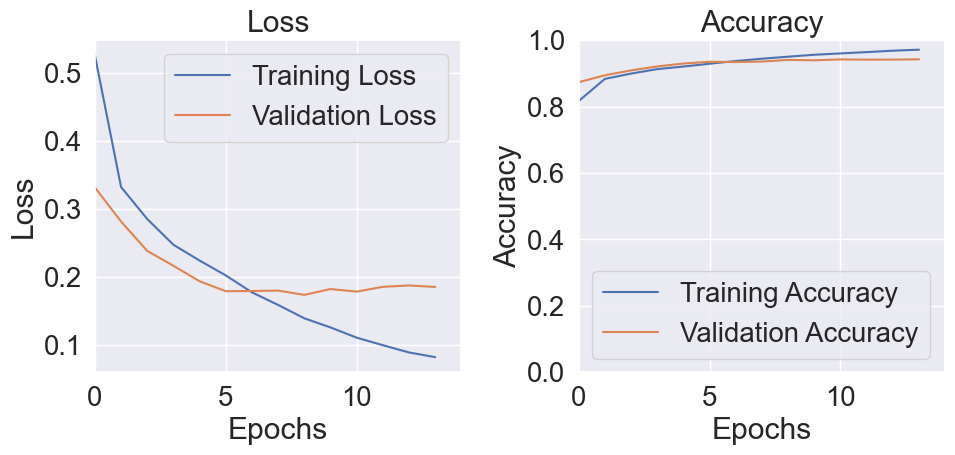

In [49]:
# Función para graficar las curvas 'loss' y 'accuracy'
def plot_learning_curves(history):
    plt.figure(figsize=(10, 5))

    # Plot de pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.xlim(0, len(history.history["loss"]))  # Establece límites para el eje x
    plt.legend()

    # Plot de precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)  # Establece límites para el eje y
    plt.xlim(0, len(history.history["accuracy"]))  # Establece límites para el eje x
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_learning_curves(history)

313/313 [==============================] - 1s 4ms/step


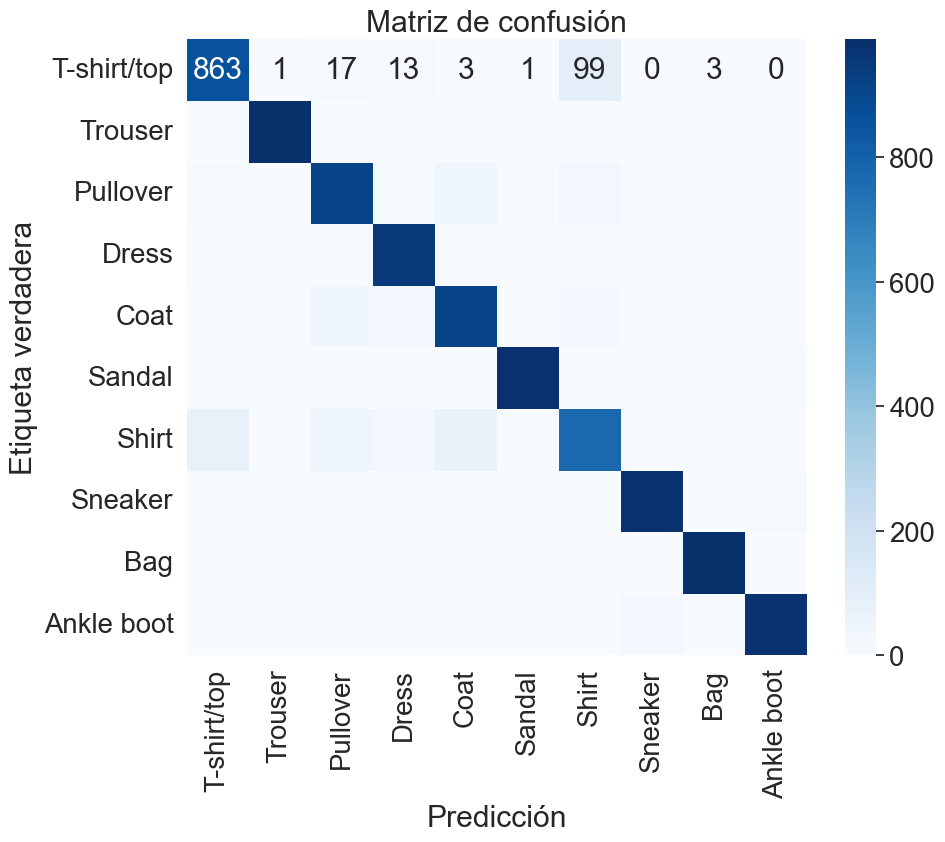

In [50]:
# Obtener predicciones del conjunto de prueba
y_pred = model.predict(test_images)

# Convertir las predicciones de las clases en etiquetas
y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(test_labels.values, axis=1)

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(test_labels, y_pred_classes)
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de confusión")
plt.show()